### Ensemble AUC

In [34]:
#### On veut la courbe Ensemble sur validation set & Ensemble sur train set  dans le meme repere . 

import pandas as pd
from sklearn.metrics import roc_auc_score
from bigml.api import BigML

def data_auc(n):
    # path 

    batch_path_ens  = f"files_csv_perf/GiveMeCredit_Review_Ensemble_Train{n}.csv"
    batch_path_ens_train  = f"files_csv_perf_train/GiveMeCredit_Review_Ensemble_Train{n}.csv"

    # AUC Ensemble sur val_set

    df_ens = pd.read_csv(batch_path_ens, index_col=0)


    actual_ens = df_ens['SeriousDlqin2yrs']
    scores_ens = df_ens['1 probability']
    auc_ens = roc_auc_score(actual_ens, scores_ens)
    
    # AUC Ensemble sur train_set
    
    df_ens_train = pd.read_csv(batch_path_ens_train, index_col=0)
    
    actual_ens_train = df_ens_train['SeriousDlqin2yrs']
    scores_ens_train = df_ens_train['1 probability']
    auc_ens_train = roc_auc_score(actual_ens_train, scores_ens_train)
    
    return auc_ens , auc_ens_train
    


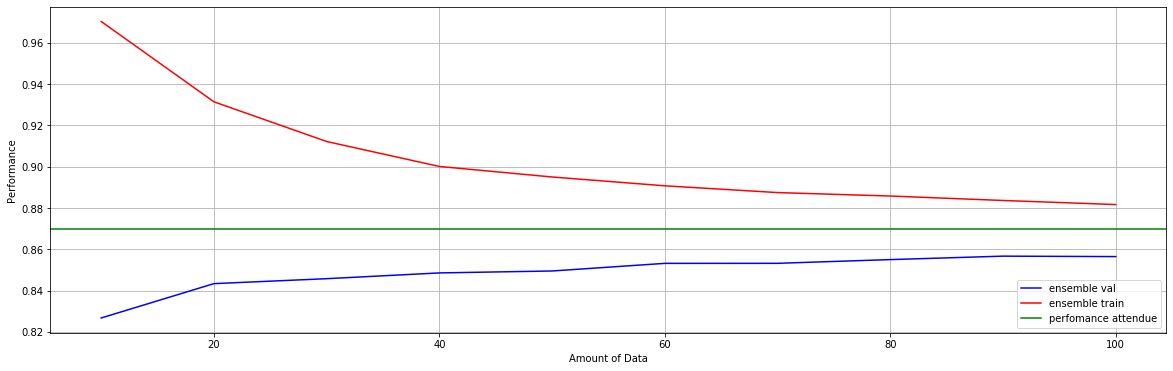

In [35]:
import matplotlib.pyplot as plt

n = 10
auc_list_ens = []
auc_list_ens_train = []
data_amount_list = []
while n <= 100:
    auc_ens , auc_ens_train = data_auc(n)
    auc_list_ens.append(auc_ens)
    auc_list_ens_train.append(auc_ens_train)
    data_amount_list.append(n)
    n += 10
    
plt.rcParams['figure.figsize'] = [20 , 6]
plt.xlabel("Amount of Data")
plt.ylabel("Performance")
plt.plot(data_amount_list,auc_list_ens, color="blue", label='ensemble val')
plt.plot(data_amount_list,auc_list_ens_train, color="red", label='ensemble train')
plt.grid()

plt.axhline(y=0.87 , color="green" , label="perfomance attendue")

plt.legend(loc="lower right")
plt.show()



### Deepnet AUC 

In [36]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from bigml.api import BigML

def data_auc_deep(n):
    # path 

    batch_path_deep  = f"files_csv_perf/GiveMeCredit_Review_Deepnet_Train{n}.csv"
    batch_path_deep_train  = f"files_csv_perf_train/GiveMeCredit_Review_Deepnet_Train{n}.csv"

    # AUC Ensemble sur val_set

    df_deep = pd.read_csv(batch_path_deep, index_col=0)


    actual_deep = df_deep['SeriousDlqin2yrs']
    scores_deep = df_deep['1 probability']
    auc_deep = roc_auc_score(actual_deep, scores_deep)
    
    # AUC Ensemble sur train_set
    
    df_deep_train = pd.read_csv(batch_path_deep_train, index_col=0)
    
    actual_deep_train = df_deep_train['SeriousDlqin2yrs']
    scores_deep_train = df_deep_train['1 probability']
    auc_deep_train = roc_auc_score(actual_deep_train, scores_deep_train)
    
    return auc_deep , auc_deep_train
    

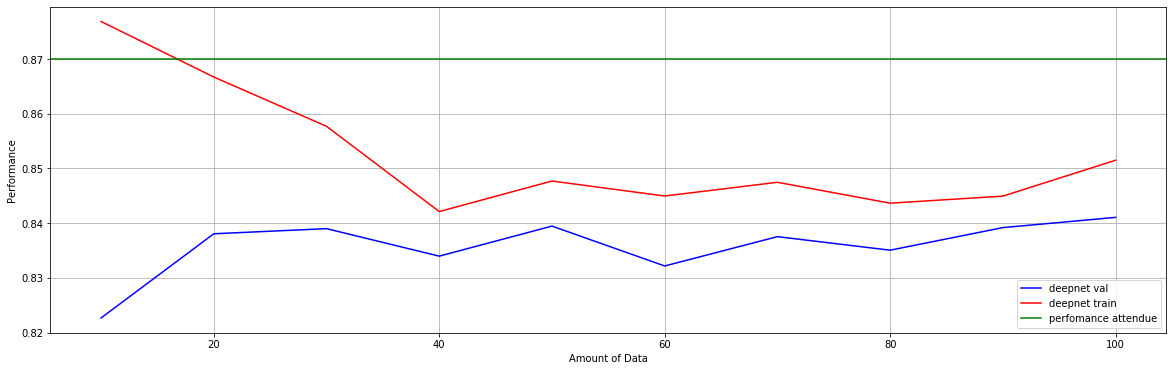

In [37]:
import matplotlib.pyplot as plt

n = 10
auc_list_deep = []
auc_list_deep_train = []
data_amount_list = []
while n <= 100:
    auc_deep , auc_deep_train = data_auc_deep(n)
    auc_list_deep.append(auc_deep)
    auc_list_deep_train.append(auc_deep_train)
    data_amount_list.append(n)
    n += 10
    
plt.rcParams['figure.figsize'] = [20 , 6]
plt.xlabel("Amount of Data")
plt.ylabel("Performance")
plt.plot(data_amount_list,auc_list_deep, color="blue", label='deepnet val')
plt.plot(data_amount_list,auc_list_deep_train, color="red", label='deepnet train')
plt.grid()

plt.axhline(y=0.87 , color="green" , label="perfomance attendue")

plt.legend(loc="lower right")
plt.show()